In [5]:
## import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [9]:
## Load dataset and display first two row
df = pd.read_csv("D:/fraud_check.csv")
print(df.head(2))

  Undergrad Marital_Status  Taxable_Income  City_Population  Work_Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   

  Urban  
0   YES  
1   YES  


In [11]:
## Info of dataset
df.info

<bound method DataFrame.info of     Undergrad Marital_Status  Taxable_Income  City_Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work_Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..           

In [13]:
## Describing data
df.describe

<bound method NDFrame.describe of     Undergrad Marital_Status  Taxable_Income  City_Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work_Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..         

In [17]:
## Convert Taxable_Income to Risk Target variable
df['Risk'] = df['Taxable_Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')


In [19]:
df.drop('Taxable_Income', axis=1, inplace=True)


### Exploratory Data Analysis(EDA)

In [23]:
## checking data is clean or not
df.isnull().sum()

Undergrad          0
Marital_Status     0
City_Population    0
Work_Experience    0
Urban              0
Risk               0
dtype: int64

In [37]:
## Countplot for distribution of risk
sns.countplot(x='Risk', data=df)
plt.title('Distribution of Risk')
plt.show()


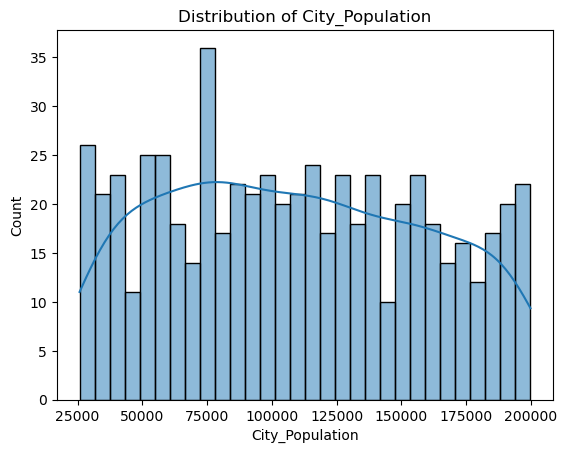

In [45]:
## Histplot for Distribution of city_population
sns.histplot(df['City_Population'], bins=30, kde=True)
plt.title('Distribution of City_Population')
plt.show()


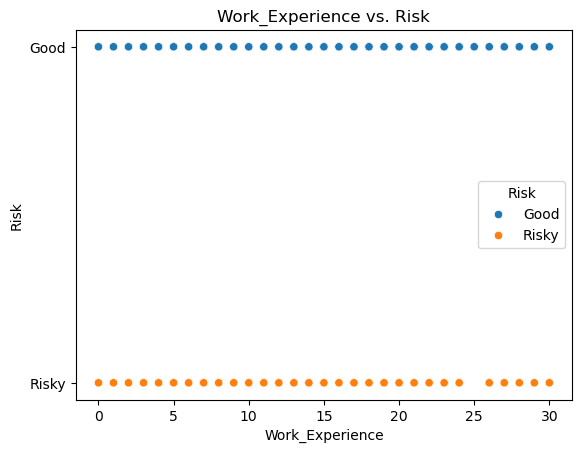

In [51]:
## Scattarplot for work_Experience VS risk
sns.scatterplot(x='Work_Experience', y='Risk', data=df, hue='Risk')
plt.title('Work_Experience vs. Risk')
plt.show()


In [83]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

In [85]:
# Check the data types to confirm all categorical variables are encoded
df_encoded.dtypes

City_Population           int64
Work_Experience           int64
Undergrad_YES              bool
Marital_Status_Married     bool
Marital_Status_Single      bool
Urban_YES                  bool
Risk_Risky                 bool
dtype: object

In [79]:
## Calculate correlation matrix
correlation_matrix = df_encoded.corr()


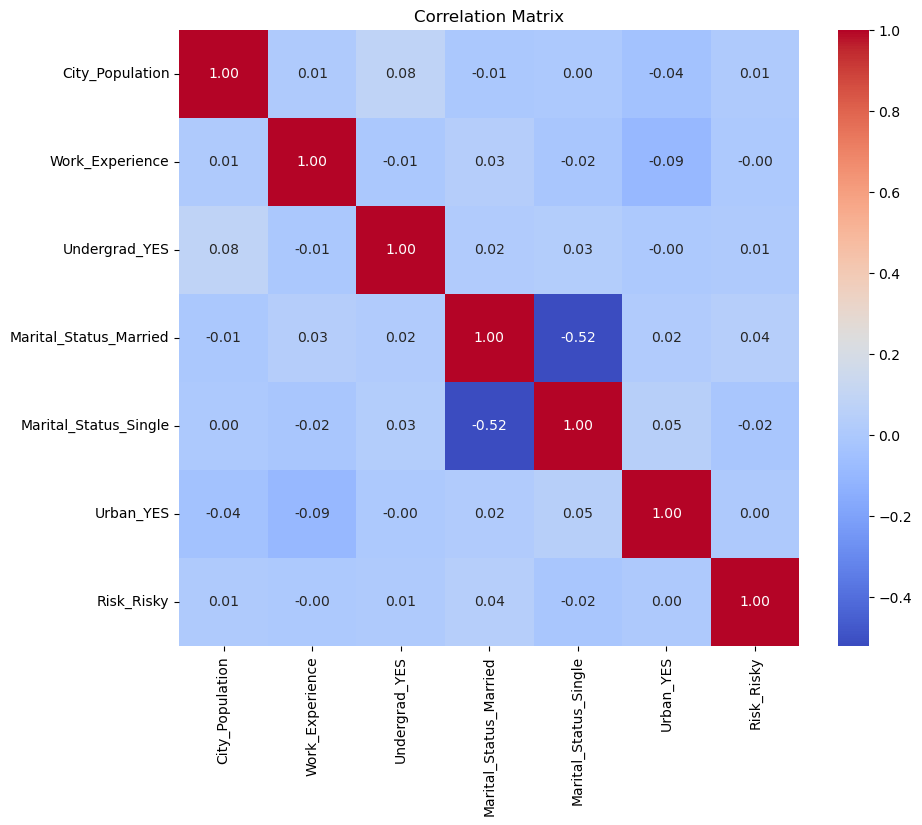

In [87]:
## plot Histogram
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [75]:
df_encoded.dtypes

City_Population           int64
Work_Experience           int64
Undergrad_YES              bool
Marital_Status_Married     bool
Marital_Status_Single      bool
Urban_YES                  bool
Risk_Risky                 bool
dtype: object